In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model
from sklearn import preprocessing
import keras
import matplotlib.ticker as ticker

In [3]:
## 读入数据
dataframe = pd.read_csv(r'C:\Users\Winnie Lee\Desktop\HKU\capstone\monthly_SST_34.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
# 将整型变为float
dataset = dataset.astype('float32')
#归一化 
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# 70%的数据作为训练数据
train_size = int(len(dataset) * 0.7)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

In [4]:
def create_dataset(dataset, look_back):
#look_back = timestep
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX),np.array(dataY)

#用3个月的数据作为滑窗
look_back = 3
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)

In [5]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='MeanSquaredError', optimizer='adam')##mean_squared_error
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=1)
##model.save(os.path.join("DATA","Test" + ".h5"))
# make predictions

Epoch 1/100
59/59 [==============================] - 1s 20ms/step - loss: 0.0813
Epoch 2/100
59/59 [==============================] - 1s 16ms/step - loss: 0.0207
Epoch 3/100
59/59 [==============================] - 1s 24ms/step - loss: 0.0124: 0s - loss: 0.01
Epoch 4/100
59/59 [==============================] - 1s 17ms/step - loss: 0.0114
Epoch 5/100
59/59 [==============================] - 1s 17ms/step - loss: 0.0105
Epoch 6/100
59/59 [==============================] - 1s 14ms/step - loss: 0.0096
Epoch 7/100
59/59 [==============================] - 1s 15ms/step - loss: 0.0089
Epoch 8/100
59/59 [==============================] - 1s 14ms/step - loss: 0.0083
Epoch 9/100
59/59 [==============================] - 1s 12ms/step - loss: 0.0079: 0s - loss
Epoch 10/100
59/59 [==============================] - 1s 13ms/step - loss: 0.0075
Epoch 11/100
59/59 [==============================] - 1s 12ms/step - loss: 0.0074
Epoch 12/100
59/59 [==============================] - 1s 14ms/step - loss: 0.00

59/59 [==============================] - 1s 15ms/step - loss: 0.0027


In [6]:
#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

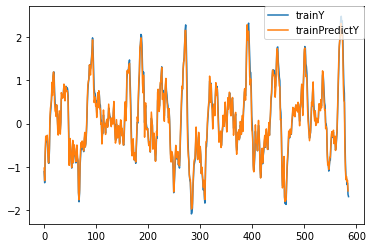

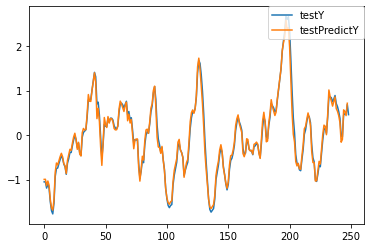

In [7]:
plt.plot(trainY,label="trainY")
plt.plot(trainPredict[1:],label="trainPredictY")
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.show()
plt.plot(testY,label="testY")
plt.plot(testPredict[1:],label="testPredictY")
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.show()

In [8]:
loss_fn = keras.losses.MeanSquaredError(reduction='sum_over_batch_size')##sum_over_batch_size
loss_fn(trainY,trainPredict)

<tf.Tensor: shape=(), dtype=float32, numpy=0.060201034>

In [9]:
loss_fn(testY[6:],testPredict[6:])

<tf.Tensor: shape=(), dtype=float32, numpy=0.040899456>

In [10]:
loss_fn(trainY,trainPredict*0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.73169935>

In [47]:
dataframe.describe()

,NINO12
count,843.000000
mean,0.034294
std,0.851341
min,-2.090000
25%,-0.550000
50%,0.000000
75%,0.535000
max,2.670000


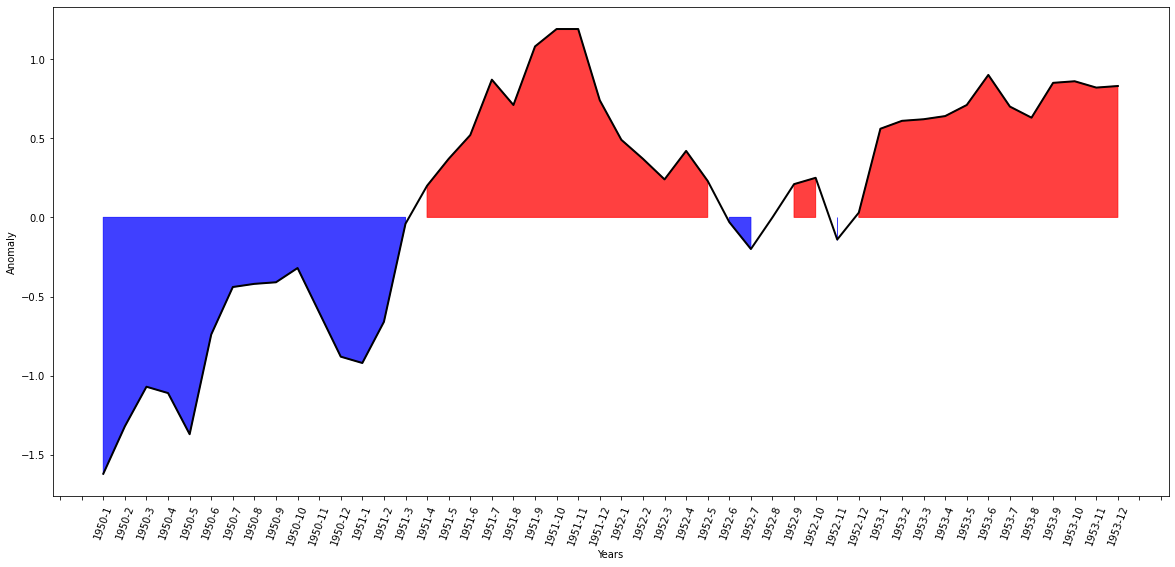

In [68]:
#dates = pd.date_range('1981','2011', freq='MS', closed='left')
#oni_df = pd.DataFrame({'date':dates,'oni':oni_ts})
#oni_df.set_index('date', inplace=True)
plot_dt = pd.read_csv(r'C:\Users\Winnie Lee\Desktop\HKU\capstone\monthly_SST_34.csv')
plt.figure(figsize=(20,9))
plt.plot(plot_dt.YR[:48], plot_dt.NINO12[:48], 'black', alpha=1, linewidth=2)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.fill_between(plot_dt.YR[:48], 0, plot_dt.NINO12[:48], plot_dt.NINO12[:48]>0,
                color='red', alpha=0.75)
plt.fill_between(plot_dt.YR[:48], 0, plot_dt.NINO12[:48], plot_dt.NINO12[:48]<0,
                color='blue', alpha=0.75)

plt.xticks(rotation=70)
plt.xlabel('Years')
plt.ylabel('Anomaly')
plt.savefig("SSTA.png")
plt.show()
#plt.title('SSTA 70-year (1950-2020)', fontsize=12)

In [63]:

plt.savefig("SSTA.png")

<Figure size 432x288 with 0 Axes>

## 下面是草稿

In [39]:
def my_loss_fn(y_true,y_pred):
    squared_difference = tf.square(y_true-y_pred)
    return tf.reduce_mean(squared_difference,axis=-1)
model.compile(optimizer='adam', loss=my_loss_fn)

In [38]:
import tensorflow as tf

In [38]:
dataframe.head()

,NINO12
0,-1.62
1,-1.32
2,-1.07
3,-1.11
4,-1.37
